Name :Pratham Shewale 
Class : TE-B
Roll-no: 22618

### 1. Adult.csv - Provide summary statistics for a dataset with numeric variables grouped by one of the qualitative variables

In [18]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
# Load the dataset
df = pd.read_csv("adult.csv")

# Display the first few rows to understand the dataset
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [19]:
# Group by 'age' and compute statistics for 'age' using predefined functions
group = df.groupby("gender")["age"]
mean = group.mean()
median = group.median()
minimum = group.min()
maximum = group.max()
stddev = group.std()

myList = [mean, median, minimum, maximum, stddev]
for i in myList: print(i,"\n")

gender
Female    36.927989
Male      39.494395
Name: age, dtype: float64 

gender
Female    35.0
Male      38.0
Name: age, dtype: float64 

gender
Female    17
Male      17
Name: age, dtype: int64 

gender
Female    90
Male      90
Name: age, dtype: int64 

gender
Female    14.137423
Male      13.412850
Name: age, dtype: float64 



In [20]:
# Group by 'marital-status' and compute summary statistics for 'age'
grouped1 = df.groupby("marital-status")["age"].agg(["mean", "median", "min", "max", "std"])
grouped1

,mean,median,min,max,std
marital-status,,,,,
Divorced,43.159204,42.0,18,90,10.554028
Married-AF-spouse,31.945946,30.0,19,75,10.697731
Married-civ-spouse,43.353724,42.0,17,90,12.074762
Married-spouse-absent,40.613057,40.0,17,87,12.852678
Never-married,28.128064,25.0,17,90,9.950846
Separated,39.725490,39.0,18,90,10.779031
Widowed,59.377470,60.0,17,90,12.208438


In [21]:
# Group by 'gender' and 'income' and compute summary statistics for 'age'
grouped2 = df.groupby(["gender", "income"])["age"].agg(["mean", "median", "min", "max", "std"])
grouped2

mean  median  min  max        std
gender income                                        
Female <=50K   36.278999    34.0   17   90  14.387450
       >50K    42.219333    41.0   19   90  10.504871
Male   <=50K   37.248548    35.0   17   90  13.908567
       >50K    44.641863    44.0   19   90  10.527021

In [22]:
# Step 1: Select numeric columns
numeric_cols = df.select_dtypes(include=['number', 'float64' ,'int64']).columns

# Step 2: Drop rows with missing values in numeric columns
df_clean = df.dropna(subset=numeric_cols)
print("Before Cleaning:", df_clean.shape)

# Step 3: Dictionary to store outliers
outliers_dict = {}

# Step 4: Detect and store outliers per column
for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df_clean[(df_clean[col] < lower) | (df_clean[col] > upper)]
    
    # Store if outliers are present
    if not outliers.empty:
        outliers_dict[col] = outliers[[col]]

    # Remove outliers from the data
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

print(f"\nFinal cleaned data shape: {df_clean.shape}")


Before Cleaning: (48842, 15)

Final cleaned data shape: (28560, 15)


In [23]:
print(outliers_dict.keys())

dict_keys(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week'])


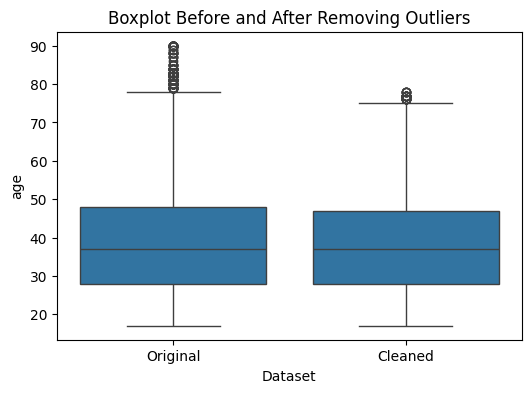

In [25]:
plot_df = pd.DataFrame({
    'age': pd.concat([
        df['age'],  # original
        df_clean['age'],  # cleaned
    ], ignore_index=True),
    'Dataset': ['Original'] * len(df) + ['Cleaned'] * len(df_clean)
})

# Plot side-by-side boxplots
plt.figure(figsize=(6, 4))
sns.boxplot(x='Dataset', y='age', data=plot_df)
plt.title("Boxplot Before and After Removing Outliers")
plt.show()


### 2. Iris.csv - Write a Python program to display some basic statistical details of the species of ‘Iris-setosa’, ‘Iris-versicolor’ and ‘Iris-virginica’ of iris.csv dataset

In [13]:
import pandas as pd

# Load the dataset
df2 = pd.read_csv("iris.csv")

# Display first few rows to understand dataset
df2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


- Without groupby() function

In [14]:
uni = df2["Species"].unique()
for species in list(uni):
    print("\n"+species)
    sp = df2["Species"] == species
    print(df2[sp].describe())


Iris-setosa
             Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  50.00000       50.00000     50.000000      50.000000      50.00000
mean   25.50000        5.00600      3.418000       1.464000       0.24400
std    14.57738        0.35249      0.381024       0.173511       0.10721
min     1.00000        4.30000      2.300000       1.000000       0.10000
25%    13.25000        4.80000      3.125000       1.400000       0.20000
50%    25.50000        5.00000      3.400000       1.500000       0.20000
75%    37.75000        5.20000      3.675000       1.575000       0.30000
max    50.00000        5.80000      4.400000       1.900000       0.60000

Iris-versicolor
              Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   50.00000      50.000000     50.000000      50.000000     50.000000
mean    75.50000       5.936000      2.770000       4.260000      1.326000
std     14.57738       0.516171      0.313798       0.469911      0.197753
min 

- With groupby() function

In [15]:
df2.groupby(["Species"])["SepalLengthCm"].mean()

Species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: SepalLengthCm, dtype: float64

In [16]:
df2.groupby(["Species"])["SepalLengthCm"].std()

Species
Iris-setosa        0.352490
Iris-versicolor    0.516171
Iris-virginica     0.635880
Name: SepalLengthCm, dtype: float64

In [17]:
df2.groupby(["Species"])["SepalLengthCm"].quantile(q=0.25)

Species
Iris-setosa        4.800
Iris-versicolor    5.600
Iris-virginica     6.225
Name: SepalLengthCm, dtype: float64

In [18]:
df2.groupby(["Species"])["SepalLengthCm"].quantile(q=0.75)

Species
Iris-setosa        5.2
Iris-versicolor    6.3
Iris-virginica     6.9
Name: SepalLengthCm, dtype: float64